# Comparative Analysis of Detection of Email Spam

#### Domain -> Text Mining

These days email is the most powerful tool but it can become a source of a headache due to the endless spam emails. Companies and businesses send unwanted emails which aren't liked by anyone. So, we aim to test out different algorithms to detect spam emails. We perform comparative analysis using various algorithms over a certain dataset and cross validate for each. Every algorithm performs at a different efficiency level but their purpose is the same and that is to separate spam email. Once the validation and analysis is done, we pick the best algorithm based on error rate, precision and recall. 

## Importing the relevant dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from os import walk
from string import punctuation
from random import shuffle
from collections import Counter
import multiprocessing
import email


import sklearn as sk

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\Tabish Q.
[nltk_data]     Nayeemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Tabish Q.
[nltk_data]     Nayeemi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Tabish Q.
[nltk_data]     Nayeemi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Tabish Q.
[nltk_data]     Nayeemi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tabish Q.
[nltk_data]     Nayeemi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import time


- pandas is a software library written for the Python programming language for data manipulation and analysis.
- NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- Seaborn is a library in Python predominantly used for making statistical graphics. Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python.
- Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
- Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency
- Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy
- NLTK is a standard python library that provides a set of diverse algorithms for NLP. It is one of the most used libraries for NLP and Computational Linguistics

## Importing Raw Data

In [3]:
import os
for (root,dirs,files) in os.walk('enron_dataset', topdown=True):
    print (root)
    print (dirs)
    print (files)
    print ('--------------------------------')

enron_dataset
['ham', 'spam']
['Summary.txt']
--------------------------------
enron_dataset\ham
[]
['0001.2000-06-06.lokay.ham.txt', '0005.2000-06-06.lokay.ham.txt', '0009.2000-06-07.lokay.ham.txt', '0012.2000-06-08.lokay.ham.txt', '0015.2000-06-09.lokay.ham.txt', '0019.2000-06-09.lokay.ham.txt', '0025.2000-06-12.lokay.ham.txt', '0032.2000-06-13.lokay.ham.txt', '0037.2000-06-13.lokay.ham.txt', '0041.2000-06-13.lokay.ham.txt', '0043.2000-06-14.lokay.ham.txt', '0048.2000-06-14.lokay.ham.txt', '0050.2000-06-14.lokay.ham.txt', '0052.2000-06-14.lokay.ham.txt', '0053.2000-06-14.lokay.ham.txt', '0056.2000-06-14.lokay.ham.txt', '0062.2000-06-14.lokay.ham.txt', '0066.2000-06-15.lokay.ham.txt', '0073.2000-06-15.lokay.ham.txt', '0078.2000-06-19.lokay.ham.txt', '0082.2000-06-19.lokay.ham.txt', '0088.2000-06-19.lokay.ham.txt', '0094.2000-06-19.lokay.ham.txt', '0098.2000-06-20.lokay.ham.txt', '0101.2000-06-20.lokay.ham.txt', '0105.2000-06-20.lokay.ham.txt', '0109.2000-06-20.lokay.ham.txt', '0113.20

In [4]:
# Read the whole data from the Enron Dataset into a variable allData.

pathwalk = walk(r"enron_dataset")

allHamData, allSpamData = [], []
for root, dr, file in pathwalk:
    if 'ham' in str(file):
        for obj in file:
            with open(root + '/' + obj, encoding='latin1') as ip:
                allHamData.append(" ".join(ip.readlines()))
                
    elif 'spam' in str(file):
        for obj in file:
            with open(root + '/' + obj, encoding='latin1') as ip:
                allSpamData.append(" ".join(ip.readlines()))

In [5]:
# remove all redundent data

allHamData = list(set(allHamData))
allSpamData = list(set(allSpamData))

In [6]:
allHamData

["Subject: ibuyit\n eprocurement\n today marks the launch of the ibuyit eprocurement tool within enron transportation services . while many employees are using eprocurement through the b 2 b procurement tool , starting today , employees throughout ets should utilize the ibuyit eprocurement tool to purchase o & m expense materials , office supplies , it hardware and both fleet and capital work order material .\n using ibuyit is a milestone in the enron - wide cost saving effort . this new tool will enable us to monitor and analyze our expenses and enhance our value with preferred suppliers , as well as help us control costs more effectively .\n the ibuyit eprocurement tool also has the potential for unlimited growth when partnered with the ets procurement organization , the gss organization and good business sense .\n as you use ibuyit , please provide morris brassfield and the ibuyit team feedback to ensure that the eprocurement tool becomes and remains a valuable and integral part of 

In [7]:
# storing it in a dataframe

hamPlusSpamData = allHamData + allSpamData
labels = ["ham"]*len(allHamData) + ["spam"]*len(allSpamData)

raw_df = pd.DataFrame({"email": hamPlusSpamData, 
                       "label": labels})

In [8]:
raw_df.shape

(5989, 2)

In [9]:
# checking how it looks

raw_df.head(5)

,email,label
0,Subject: ibuyit\n eprocurement\n today marks t...,ham
1,Subject: northeast spring membership mixer\n >...,ham
2,Subject: enronoptions - your stock option prog...,ham
3,Subject: gpg ' s day of caring at ripley house...,ham
4,"Subject: e : mail group lists\n fyi ,\n adr\n ...",ham


In [10]:
text = raw_df['email']
text

0       Subject: ibuyit\n eprocurement\n today marks t...
1       Subject: northeast spring membership mixer\n >...
2       Subject: enronoptions - your stock option prog...
3       Subject: gpg ' s day of caring at ripley house...
4       Subject: e : mail group lists\n fyi ,\n adr\n ...
                              ...                        
5984    Subject: lly ! knoila\n a recent survey showed...
5985    Subject: hot penny stocks\n limelight media gr...
5986    Subject: we have top varieties from frank mul ...
5987    Subject: stock business\n from : rev . water i...
5988    Subject: here you go\n anthropology mercenarin...
Name: email, Length: 5989, dtype: object

In [11]:
print(raw_df.loc[1]['email'])

Subject: northeast spring membership mixer
 > february 23 , 2002
 >
 >
 > nesa members :
 >
 > attached is our flyer for our ne mixer . hope to see you there .
 >
 > >


In [12]:
print("\n"+'-'*25)
print("shape of data:",raw_df.shape) 
print("\n"+'-'*25)
print("\nno dimensions of data:",raw_df.ndim)
print("\n"+'-'*25)
print("\nsize of data:",raw_df.size)
print("\n"+'-'*25)
print("\nSum fo all null values:\n",raw_df.isnull().sum())
print("\n"+'-'*25)


-------------------------
shape of data: (5989, 2)

-------------------------

no dimensions of data: 2

-------------------------

size of data: 11978

-------------------------

Sum fo all null values:
 email    0
label    0
dtype: int64

-------------------------


In [13]:
print("Column Names : \n"+'-'*25)
print(raw_df.columns)

Column Names : 
-------------------------
Index(['email', 'label'], dtype='object')


In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5989 non-null   object
 1   label   5989 non-null   object
dtypes: object(2)
memory usage: 93.7+ KB


In [16]:
print("Count of label:\n",raw_df['label'].value_counts())


Count of label:
 spam    4500
ham     1489
Name: label, dtype: int64


In [17]:
raw_df['length'] = raw_df.email.str.len()
raw_df.head()

,email,label,length
0,Subject: ibuyit\n eprocurement\n today marks t...,ham,1608
1,Subject: northeast spring membership mixer\n >...,ham,167
2,Subject: enronoptions - your stock option prog...,ham,3553
3,Subject: gpg ' s day of caring at ripley house...,ham,1429
4,"Subject: e : mail group lists\n fyi ,\n adr\n ...",ham,792


In [18]:
data=raw_df


# Data Pre-Processing

Since the data in raw form, we first have to preprocess it to make it more optimized 

### 1. Removing Punctuations

removing punctuations such as commas and full-stops from the data

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
# Function to remove punctuations.
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

data["body_text_clean"] = data["email"].apply(lambda x: remove_punc(x))

data.head()

,email,label,length,body_text_clean
0,Subject: ibuyit\n eprocurement\n today marks t...,ham,1608,Subject ibuyit\n eprocurement\n today marks th...
1,Subject: northeast spring membership mixer\n >...,ham,167,Subject northeast spring membership mixer\n f...
2,Subject: enronoptions - your stock option prog...,ham,3553,Subject enronoptions your stock option progra...
3,Subject: gpg ' s day of caring at ripley house...,ham,1429,Subject gpg s day of caring at ripley house ...
4,"Subject: e : mail group lists\n fyi ,\n adr\n ...",ham,792,Subject e mail group lists\n fyi \n adr\n ...


### 2. Tokenization

tokenizing each word and storing as a list

In [21]:
import re

#function to apply tokenization
def tokenize(text):
    tokens = re.split("\W+", text)# W+ means all capital, small alphabets and integers 0-9
    return tokens

data["body_text_tokenized"] = data["body_text_clean"].apply(lambda x: tokenize(x))

data.head()

,email,label,length,body_text_clean,body_text_tokenized
0,Subject: ibuyit\n eprocurement\n today marks t...,ham,1608,Subject ibuyit\n eprocurement\n today marks th...,"[Subject, ibuyit, eprocurement, today, marks, ..."
1,Subject: northeast spring membership mixer\n >...,ham,167,Subject northeast spring membership mixer\n f...,"[Subject, northeast, spring, membership, mixer..."
2,Subject: enronoptions - your stock option prog...,ham,3553,Subject enronoptions your stock option progra...,"[Subject, enronoptions, your, stock, option, p..."
3,Subject: gpg ' s day of caring at ripley house...,ham,1429,Subject gpg s day of caring at ripley house ...,"[Subject, gpg, s, day, of, caring, at, ripley,..."
4,"Subject: e : mail group lists\n fyi ,\n adr\n ...",ham,792,Subject e mail group lists\n fyi \n adr\n ...,"[Subject, e, mail, group, lists, fyi, adr, for..."


### 3. Removing Stopwords

using NLTK :: Natural Language Toolkit to remove/filter out the stopwords (useless data)

In [22]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]# to remove all stopwords
    return text

data["body_text_nonstop"] = data["body_text_tokenized"].apply(lambda x: remove_stopwords(x))
data.head()

,email,label,length,body_text_clean,body_text_tokenized,body_text_nonstop
0,Subject: ibuyit\n eprocurement\n today marks t...,ham,1608,Subject ibuyit\n eprocurement\n today marks th...,"[Subject, ibuyit, eprocurement, today, marks, ...","[Subject, ibuyit, eprocurement, today, marks, ..."
1,Subject: northeast spring membership mixer\n >...,ham,167,Subject northeast spring membership mixer\n f...,"[Subject, northeast, spring, membership, mixer...","[Subject, northeast, spring, membership, mixer..."
2,Subject: enronoptions - your stock option prog...,ham,3553,Subject enronoptions your stock option progra...,"[Subject, enronoptions, your, stock, option, p...","[Subject, enronoptions, stock, option, program..."
3,Subject: gpg ' s day of caring at ripley house...,ham,1429,Subject gpg s day of caring at ripley house ...,"[Subject, gpg, s, day, of, caring, at, ripley,...","[Subject, gpg, day, caring, ripley, house, sep..."
4,"Subject: e : mail group lists\n fyi ,\n adr\n ...",ham,792,Subject e mail group lists\n fyi \n adr\n ...,"[Subject, e, mail, group, lists, fyi, adr, for...","[Subject, e, mail, group, lists, fyi, adr, for..."


### 4. Stemming

Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language

In [23]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

data["body_text_stemmed"] = data["body_text_nonstop"].apply(lambda x: stemming(x))
data.head()

,email,label,length,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed
0,Subject: ibuyit\n eprocurement\n today marks t...,ham,1608,Subject ibuyit\n eprocurement\n today marks th...,"[Subject, ibuyit, eprocurement, today, marks, ...","[Subject, ibuyit, eprocurement, today, marks, ...","[subject, ibuyit, eprocur, today, mark, launch..."
1,Subject: northeast spring membership mixer\n >...,ham,167,Subject northeast spring membership mixer\n f...,"[Subject, northeast, spring, membership, mixer...","[Subject, northeast, spring, membership, mixer...","[subject, northeast, spring, membership, mixer..."
2,Subject: enronoptions - your stock option prog...,ham,3553,Subject enronoptions your stock option progra...,"[Subject, enronoptions, your, stock, option, p...","[Subject, enronoptions, stock, option, program...","[subject, enronopt, stock, option, program, am..."
3,Subject: gpg ' s day of caring at ripley house...,ham,1429,Subject gpg s day of caring at ripley house ...,"[Subject, gpg, s, day, of, caring, at, ripley,...","[Subject, gpg, day, caring, ripley, house, sep...","[subject, gpg, day, care, ripley, hous, sept, ..."
4,"Subject: e : mail group lists\n fyi ,\n adr\n ...",ham,792,Subject e mail group lists\n fyi \n adr\n ...,"[Subject, e, mail, group, lists, fyi, adr, for...","[Subject, e, mail, group, lists, fyi, adr, for...","[subject, e, mail, group, list, fyi, adr, forw..."


### 5. Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [24]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

data["body_text_lemmatized"] = data["body_text_stemmed"].apply(lambda x: lemmatizer(x))
data.head()

,email,label,length,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,Subject: ibuyit\n eprocurement\n today marks t...,ham,1608,Subject ibuyit\n eprocurement\n today marks th...,"[Subject, ibuyit, eprocurement, today, marks, ...","[Subject, ibuyit, eprocurement, today, marks, ...","[subject, ibuyit, eprocur, today, mark, launch...","[subject, ibuyit, eprocur, today, mark, launch..."
1,Subject: northeast spring membership mixer\n >...,ham,167,Subject northeast spring membership mixer\n f...,"[Subject, northeast, spring, membership, mixer...","[Subject, northeast, spring, membership, mixer...","[subject, northeast, spring, membership, mixer...","[subject, northeast, spring, membership, mixer..."
2,Subject: enronoptions - your stock option prog...,ham,3553,Subject enronoptions your stock option progra...,"[Subject, enronoptions, your, stock, option, p...","[Subject, enronoptions, stock, option, program...","[subject, enronopt, stock, option, program, am...","[subject, enronopt, stock, option, program, am..."
3,Subject: gpg ' s day of caring at ripley house...,ham,1429,Subject gpg s day of caring at ripley house ...,"[Subject, gpg, s, day, of, caring, at, ripley,...","[Subject, gpg, day, caring, ripley, house, sep...","[subject, gpg, day, care, ripley, hous, sept, ...","[subject, gpg, day, care, ripley, hous, sept, ..."
4,"Subject: e : mail group lists\n fyi ,\n adr\n ...",ham,792,Subject e mail group lists\n fyi \n adr\n ...,"[Subject, e, mail, group, lists, fyi, adr, for...","[Subject, e, mail, group, lists, fyi, adr, for...","[subject, e, mail, group, list, fyi, adr, forw...","[subject, e, mail, group, list, fyi, adr, forw..."


In [25]:
data['body_text_length'] = data.email.str.len()
data['body_text_clean_length'] = data.body_text_clean.str.len()

data.head()

,email,label,length,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized,body_text_length,body_text_clean_length
0,Subject: ibuyit\n eprocurement\n today marks t...,ham,1608,Subject ibuyit\n eprocurement\n today marks th...,"[Subject, ibuyit, eprocurement, today, marks, ...","[Subject, ibuyit, eprocurement, today, marks, ...","[subject, ibuyit, eprocur, today, mark, launch...","[subject, ibuyit, eprocur, today, mark, launch...",1608,1573
1,Subject: northeast spring membership mixer\n >...,ham,167,Subject northeast spring membership mixer\n f...,"[Subject, northeast, spring, membership, mixer...","[Subject, northeast, spring, membership, mixer...","[subject, northeast, spring, membership, mixer...","[subject, northeast, spring, membership, mixer...",167,153
2,Subject: enronoptions - your stock option prog...,ham,3553,Subject enronoptions your stock option progra...,"[Subject, enronoptions, your, stock, option, p...","[Subject, enronoptions, stock, option, program...","[subject, enronopt, stock, option, program, am...","[subject, enronopt, stock, option, program, am...",3553,3456
3,Subject: gpg ' s day of caring at ripley house...,ham,1429,Subject gpg s day of caring at ripley house ...,"[Subject, gpg, s, day, of, caring, at, ripley,...","[Subject, gpg, day, caring, ripley, house, sep...","[subject, gpg, day, care, ripley, hous, sept, ...","[subject, gpg, day, care, ripley, hous, sept, ...",1429,1378
4,"Subject: e : mail group lists\n fyi ,\n adr\n ...",ham,792,Subject e mail group lists\n fyi \n adr\n ...,"[Subject, e, mail, group, lists, fyi, adr, for...","[Subject, e, mail, group, lists, fyi, adr, for...","[subject, e, mail, group, list, fyi, adr, forw...","[subject, e, mail, group, list, fyi, adr, forw...",792,695


In [26]:
data['body_text_length']

0       1608
1        167
2       3553
3       1429
4        792
        ... 
5984     214
5985    8005
5986     953
5987    1131
5988     474
Name: body_text_length, Length: 5989, dtype: int64

In [27]:
#Total length removal
print("Original Length:",data['body_text_length'].sum())
print("Cleaned Length:",data['body_text_clean_length'].sum())
print("Total Words Removed:",(data['body_text_length'].sum()) - (data['body_text_clean_length'].sum()))

Original Length: 8864049
Cleaned Length: 8522585
Total Words Removed: 341464


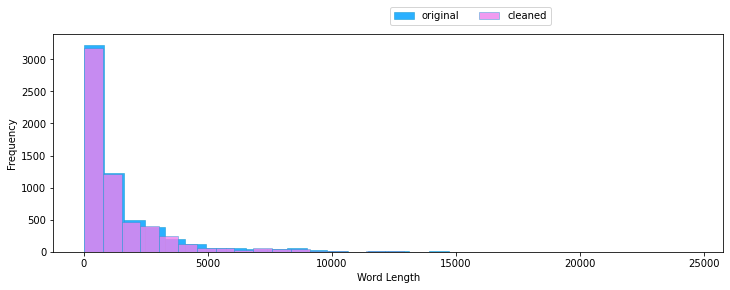

In [28]:
data['body_text_length'].plot(bins=30, kind='hist',figsize=(12,4), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5) ; 
data['body_text_clean_length'].plot(bins=30, kind='hist',figsize=(12,4),alpha =0.8, facecolor = 'violet', edgecolor='#169acf', linewidth=0.5);
plt.xlabel("Word Length");
plt.legend(['original', 'cleaned'], bbox_to_anchor=(0.75, 1.15), ncol=2);

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   email                   5989 non-null   object
 1   label                   5989 non-null   object
 2   length                  5989 non-null   int64 
 3   body_text_clean         5989 non-null   object
 4   body_text_tokenized     5989 non-null   object
 5   body_text_nonstop       5989 non-null   object
 6   body_text_stemmed       5989 non-null   object
 7   body_text_lemmatized    5989 non-null   object
 8   body_text_length        5989 non-null   int64 
 9   body_text_clean_length  5989 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 468.0+ KB


# Exploratory Data Analysis


To find trends and patterns in this dataset, we perform exploratory data analysis.

First, we define a new data column with numbers of characters, words and sentences

In [30]:
data_eda=data
#creating a new copy of the dataframe


In [31]:
data_eda['num_characters'] = data['email'].apply(len)
# num of words
data_eda['num_words'] = data['email'].apply(lambda x:len(nltk.word_tokenize(x)))
data_eda['num_sentences'] = data['email'].apply(lambda x:len(nltk.sent_tokenize(x)))
#data_eda.pop('length')
data_eda.head()

,email,label,length,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized,body_text_length,body_text_clean_length,num_characters,num_words,num_sentences
0,Subject: ibuyit\n eprocurement\n today marks t...,ham,1608,Subject ibuyit\n eprocurement\n today marks th...,"[Subject, ibuyit, eprocurement, today, marks, ...","[Subject, ibuyit, eprocurement, today, marks, ...","[subject, ibuyit, eprocur, today, mark, launch...","[subject, ibuyit, eprocur, today, mark, launch...",1608,1573,1608,279,13
1,Subject: northeast spring membership mixer\n >...,ham,167,Subject northeast spring membership mixer\n f...,"[Subject, northeast, spring, membership, mixer...","[Subject, northeast, spring, membership, mixer...","[subject, northeast, spring, membership, mixer...","[subject, northeast, spring, membership, mixer...",167,153,167,37,3
2,Subject: enronoptions - your stock option prog...,ham,3553,Subject enronoptions your stock option progra...,"[Subject, enronoptions, your, stock, option, p...","[Subject, enronoptions, stock, option, program...","[subject, enronopt, stock, option, program, am...","[subject, enronopt, stock, option, program, am...",3553,3456,3553,659,24
3,Subject: gpg ' s day of caring at ripley house...,ham,1429,Subject gpg s day of caring at ripley house ...,"[Subject, gpg, s, day, of, caring, at, ripley,...","[Subject, gpg, day, caring, ripley, house, sep...","[subject, gpg, day, care, ripley, hous, sept, ...","[subject, gpg, day, care, ripley, hous, sept, ...",1429,1378,1429,301,12
4,"Subject: e : mail group lists\n fyi ,\n adr\n ...",ham,792,Subject e mail group lists\n fyi \n adr\n ...,"[Subject, e, mail, group, lists, fyi, adr, for...","[Subject, e, mail, group, lists, fyi, adr, for...","[subject, e, mail, group, list, fyi, adr, forw...","[subject, e, mail, group, list, fyi, adr, forw...",792,695,792,217,2


In [32]:
data_eda[['num_characters','num_words','num_sentences']].describe()
#let's see the information on this dataframe

,num_characters,num_words,num_sentences
count,5989.000000,5989.000000,5989.000000
mean,1480.054934,289.446986,13.784104
std,1991.892502,378.371177,15.944385
min,14.000000,3.000000,1.000000
25%,390.000000,76.000000,4.000000
50%,750.000000,155.000000,9.000000
75%,1712.000000,342.000000,17.000000
max,24522.000000,5521.000000,252.000000


In [33]:
#for ham
data_eda[data_eda['label'] == 'ham'][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,1489.000000,1489.000000,1489.000000
mean,1578.148422,320.797179,13.505037
std,2007.090004,402.540837,17.197075
min,17.000000,3.000000,1.000000
25%,422.000000,86.000000,4.000000
50%,1000.000000,212.000000,9.000000
75%,1970.000000,402.000000,17.000000
max,24522.000000,5521.000000,238.000000


In [34]:
#for spam
data_eda[data_eda['label'] == 'spam'][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4500.000000,4500.000000,4500.000000
mean,1447.596889,279.073556,13.876444
std,1985.995634,369.487673,15.508534
min,14.000000,4.000000,1.000000
25%,383.000000,73.000000,4.000000
50%,690.000000,143.000000,9.000000
75%,1551.250000,296.000000,18.000000
max,20952.000000,4541.000000,252.000000


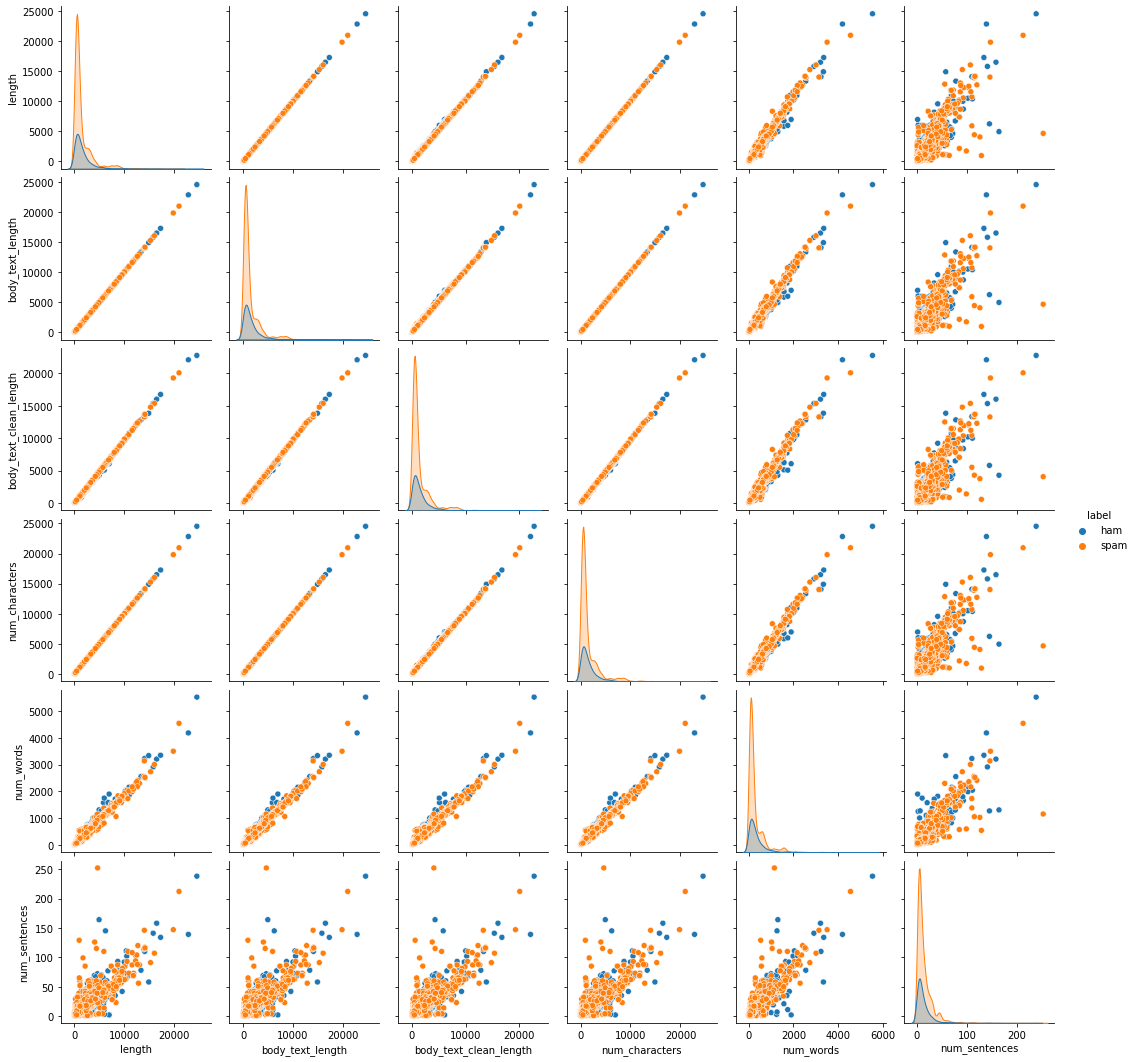

In [35]:
sns.pairplot(data_eda,hue='label')


<AxesSubplot:>

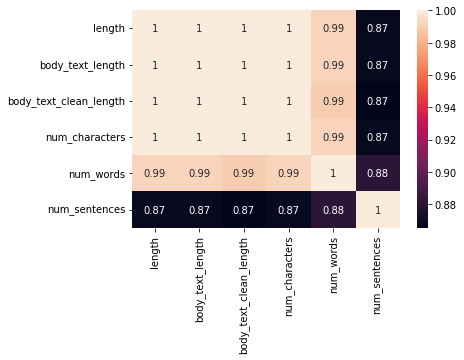

In [36]:
sns.heatmap(data_eda.corr(),annot=True)


Text(0.5, 0, 'Word Length')

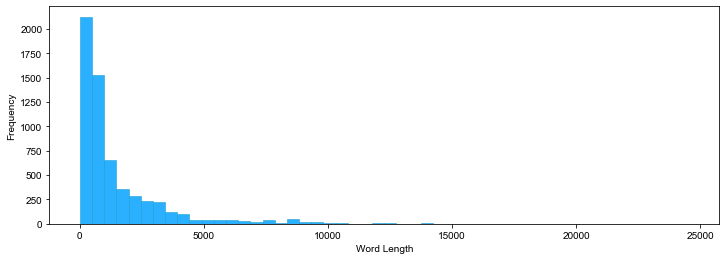

In [37]:
#checking the word length on a histogram
data['body_text_length'].plot(bins=50, kind='hist',figsize=(12,4), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5) 
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.xlabel("Word Length")


Text(0.5, 0, 'Word Length')

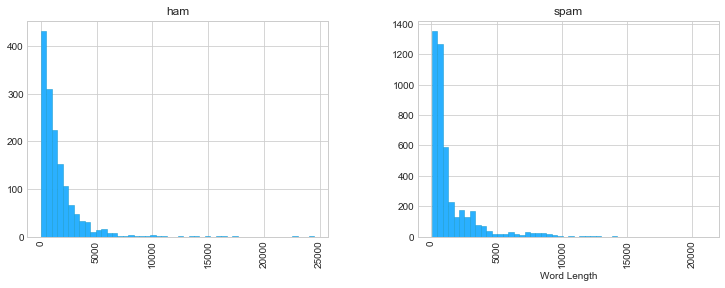

In [38]:
# x-axis ="length", separated by label,('ham' and 'spam')
data.hist(column='body_text_length', by='label', bins=50,figsize=(12,4), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5 );
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.xlabel("Word Length")

C:\Users\Tabish Q. Nayeemi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


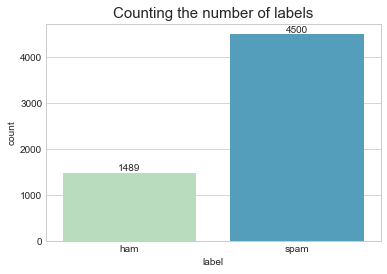

spam    4500
ham     1489
Name: label, dtype: int64


In [39]:
#Graphical Visualisation for counting number of labels.
plt.figure(figsize=(6,4));
#warnings.filterwarnings("ignore", category=FutureWarning)

g=sns.countplot(data['label'],palette= 'GnBu');
plt.title("Counting the number of labels",fontsize=15);
plt.xticks(rotation='horizontal');
g.bar_label(g.containers[0])


plt.show();

print(data.label.value_counts());

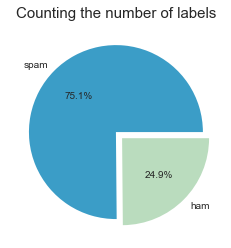

In [40]:
#using pie chart to show the count of ham and spam emails
# only "explode" the 2nd slice (i.e. 'spam')
explode = (0, 0.1)
#add colors
colors = ['#3b9dc7','#badcbe']
plt.pie(data['label'].value_counts(), labels=['spam','ham'],autopct='%1.1f%%',colors=colors,explode=explode)
plt.title("Counting the number of labels",fontsize=15);
plt.show()

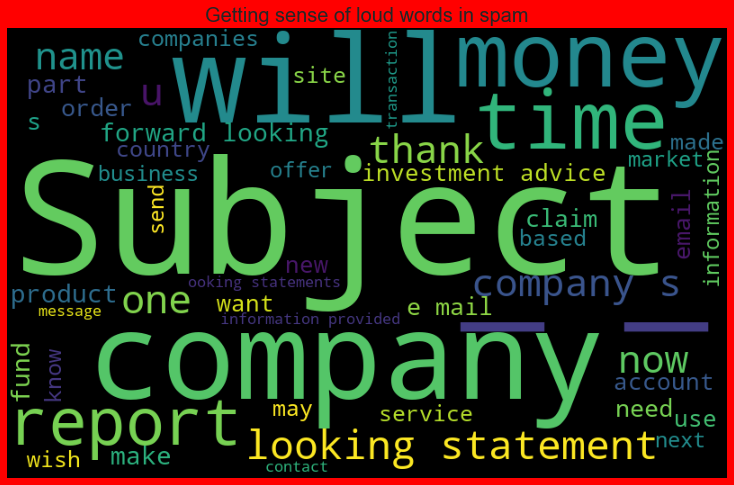

In [41]:
#Getting sense of loud words in spam 

spams = data['email'][data['label']=='spam']

spam_cloud = WordCloud(width=800,height=500,background_color='black',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.title("Getting sense of loud words in spam",fontsize=20);
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

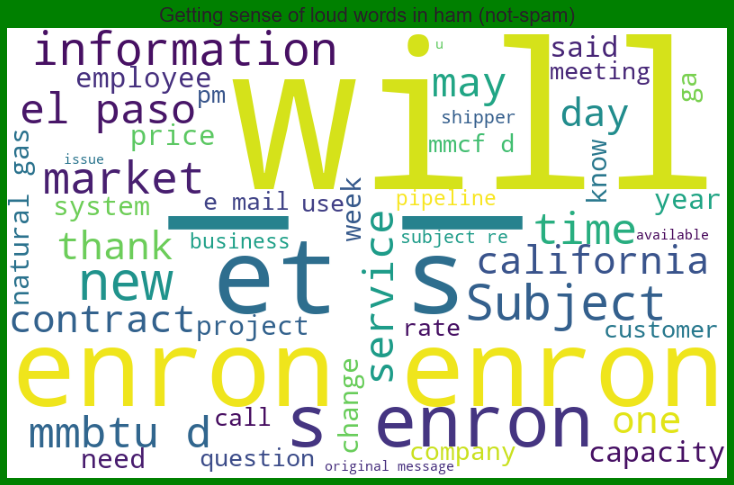

In [42]:
#Getting sense of loud words in not-spam 

not_spams = data['email'][data['label']=='ham']

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.title("Getting sense of loud words in ham (not-spam)",fontsize=20);

plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Saving the preprocessed data

In [45]:
# We save the file as CSV 
# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.
data.to_csv("C:\\Users\\Tabish Q. Nayeemi\\Desktop\\Data Analytics\\ComparativeAnalysisOfSpamEmailDetection-EnronDataset\\enron_dataset\\EmailSpamCollection_cleaned.csv", sep=',')

### Vectorizing Data: 
Encoding Text as integer i.e. numeric form to create feature vectors so that we can apply ML algos on it.


In [46]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(data, color):
    trace = go.Bar(
        y=data["word"].values[::-1],
        x=data["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [47]:

pd.set_option('display.max_colwidth', 100) # To extend column width

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

#data = pd.read_csv("EmailSpamCollection_cleaned.csv")
#data.columns = ['label', 'email']


In [48]:
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)
      # Convert all titles to vectors
    word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
    for i, (_, text_) in enumerate(text.iterrows()):
        word_vectors[i] = text_to_vector(text_[0])

In [49]:
#Converting words to vector using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['email'])
vectors.shape
 
#features = word_vectors
features = vectors
features

<5989x71455 sparse matrix of type '<class 'numpy.float64'>'
	with 751614 stored elements in Compressed Sparse Row format>

# Applying ML Algorithms for Comparative Analysis
We'll apply some classification algorithms for comparative analysis to see which algorithm will yield the best results in terms of accuracy, precision, f1-score etc

In [50]:
#importing relevant depedencies 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score    

In [51]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)


# Naive Bayes

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [52]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.2)
clf.fit(X_train, y_train)
y_pred_nb = clf.predict(X_test)
print(classification_report(y_test,y_pred_nb))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_nb),5)))
k1=round(accuracy_score(y_test,y_pred_nb),5)


              precision    recall  f1-score   support

         ham       0.86      0.93      0.90       216
        spam       0.98      0.95      0.97       683

    accuracy                           0.95       899
   macro avg       0.92      0.94      0.93       899
weighted avg       0.95      0.95      0.95       899

Accuracy score: 0.94772


In [53]:
from sklearn.metrics import precision_score
j1=round(precision_score(y_test, y_pred_nb, average='macro'),5)
j1

0.92007

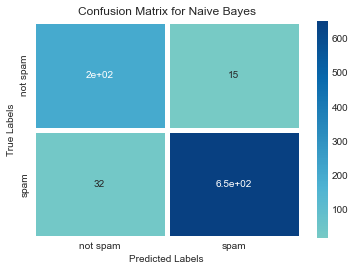

In [54]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_nb)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Naive Bayes')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

# Support Vector Machine

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

In [55]:
# Classification Model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#Training multiple machine learning algorithms
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel='sigmoid', gamma=1.0)

clfs = {'SVC' : svc}
def train(clf, features, targets):    
    clf.fit(features, targets)
def predict(clf, features):
    return (clf.predict(features))
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred_svm = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred_svm)]))

In [56]:
pred_scores_word_vectors

[('SVC', [0.985539488320356])]

In [57]:
from sklearn.metrics import classification_report
print("Classification report")
print (classification_report(y_test, pred_svm))
print("Accuracy score: {}".format(round(accuracy_score(y_test,pred_svm),5)))
k2=round(accuracy_score(y_test,pred_svm),5)

Classification report
              precision    recall  f1-score   support

         ham       1.00      0.94      0.97       216
        spam       0.98      1.00      0.99       683

    accuracy                           0.99       899
   macro avg       0.99      0.97      0.98       899
weighted avg       0.99      0.99      0.99       899

Accuracy score: 0.98554


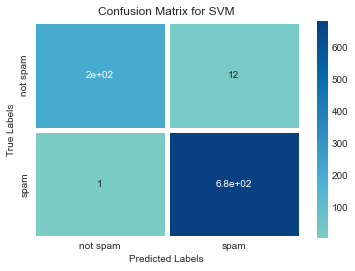

In [58]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,pred_svm)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for SVM')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

# Random Forest

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [59]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [60]:
y_pred_rf = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred_rf, pos_label='spam', average='binary')

In [61]:
print(classification_report(y_test,y_pred_rf))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_rf),5)))
k3=round(accuracy_score(y_test,y_pred_rf),5)

              precision    recall  f1-score   support

         ham       1.00      0.62      0.77       216
        spam       0.89      1.00      0.94       683

    accuracy                           0.91       899
   macro avg       0.95      0.81      0.86       899
weighted avg       0.92      0.91      0.90       899

Accuracy score: 0.9099


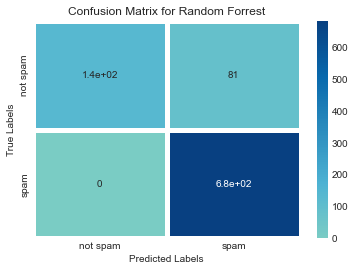

In [62]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_rf)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Random Forrest')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

# K Nearest Neighbors

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

clf = KNeighborsClassifier(n_neighbors=149, weights='uniform', algorithm='auto', p=1,metric='euclidean', n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
print(classification_report(y_test,y_pred_knn))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_knn),5)));
k4=round(accuracy_score(y_test,y_pred_knn),5)

              precision    recall  f1-score   support

         ham       1.00      0.58      0.73       216
        spam       0.88      1.00      0.94       683

    accuracy                           0.90       899
   macro avg       0.94      0.79      0.84       899
weighted avg       0.91      0.90      0.89       899

Accuracy score: 0.89878


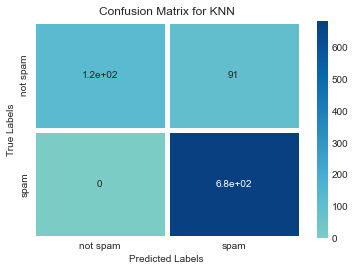

In [65]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_knn)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for KNN')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

# Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). ... Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [66]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from numpy.random import RandomState
from sklearn import preprocessing

seed = RandomState()

In [67]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

y_pred_lr = logisticRegr.predict(X_test)
print(classification_report(y_test,y_pred_lr))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_lr),5)));
k5=round(accuracy_score(y_test,y_pred_lr),5)

              precision    recall  f1-score   support

         ham       1.00      0.84      0.91       216
        spam       0.95      1.00      0.98       683

    accuracy                           0.96       899
   macro avg       0.98      0.92      0.95       899
weighted avg       0.96      0.96      0.96       899

Accuracy score: 0.96218


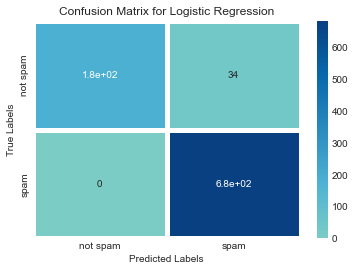

In [68]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_lr)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,center=0,cmap="GnBu")

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Logistic Regression')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

C:\Users\TABISH~1.NAY\AppData\Local\Temp/ipykernel_18224/131615503.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel("Accuracy of ML Algorithms", FontSize=16)
C:\Users\TABISH~1.NAY\AppData\Local\Temp/ipykernel_18224/131615503.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  gr.bar_label(gr.containers[0], FontSize=16)


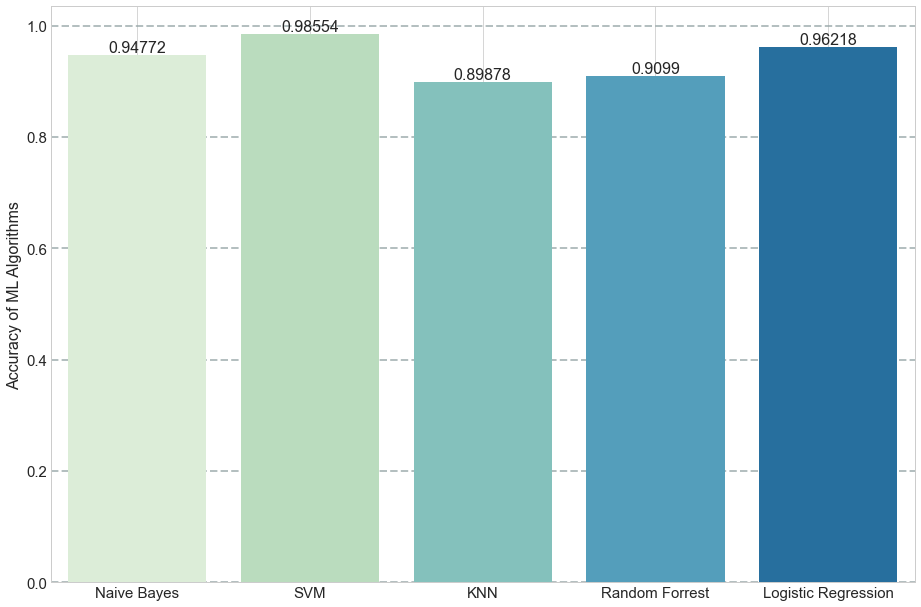

In [69]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2]);
warnings.filterwarnings("ignore", category=FutureWarning);

algos = ['Naive Bayes', 'SVM', 'KNN', 'Random Forrest', 'Logistic Regression']
acc = [k1,k2,k4,k3,k5]
gr=sns.barplot(algos,acc,palette="GnBu");
ax.set_ylabel("Accuracy of ML Algorithms", FontSize=16)
ax.tick_params(labelsize=15)
gr.bar_label(gr.containers[0], FontSize=16)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7);
plt.grid()  

plt.show();



**We can see from this bar chart that SVM has the highest accuracy almost around 1 (100%) where as KNN has the lowest accuracy score**